### Introduction

We have a MySQL database named `cities`, which contains a table called `cities` with data on 51 popular tourist destinations worldwide. This table includes:
- City names
- Geographical locations (latitude and longitude)
- Development ranking (HDI)
- Primary religion
- Language spoken

These attributes allow us to analyze and compare cities based on cultural, economic, and geographical similarities.


### Step 1: The Data

To gain insights into the data and its distribution, we’ll create some visualizations:
1. **City Locations on a World Map**: Visualizes the geographic distribution of the cities.
2. **HDI Distribution**: Shows the distribution of cities' HDI values.
3. **Religion and Language Breakdown**: Visualizes the cultural diversity in terms of religion and language.


In [23]:
import pandas as pd

# URL to the CSV file on GitHub (replace with the actual URL to your file)
url = "https://raw.githubusercontent.com/tomerud/EstiMate/main/51_cities.csv"

# Load the data into a DataFrame
cities_df = pd.read_csv(url)

# Display the first few rows to understand the structure
cities_df.head()


,City,Country,Development Ranking (HDI),Religion,Language,Location
0,Bangkok,Thailand,0.755,Buddhism,Thai,"13.7563,100.5018"
1,Paris,France,0.903,Christianity,French,"48.8566,2.3522"
2,London,United Kingdom,0.932,Christianity,English,"51.5074,-0.1278"
3,Dubai,United Arab Emirates,0.890,Islam,Arabic,"25.2048,55.2708"
4,Singapore,Singapore,0.935,Buddhism,English,"1.3521,103.8198"


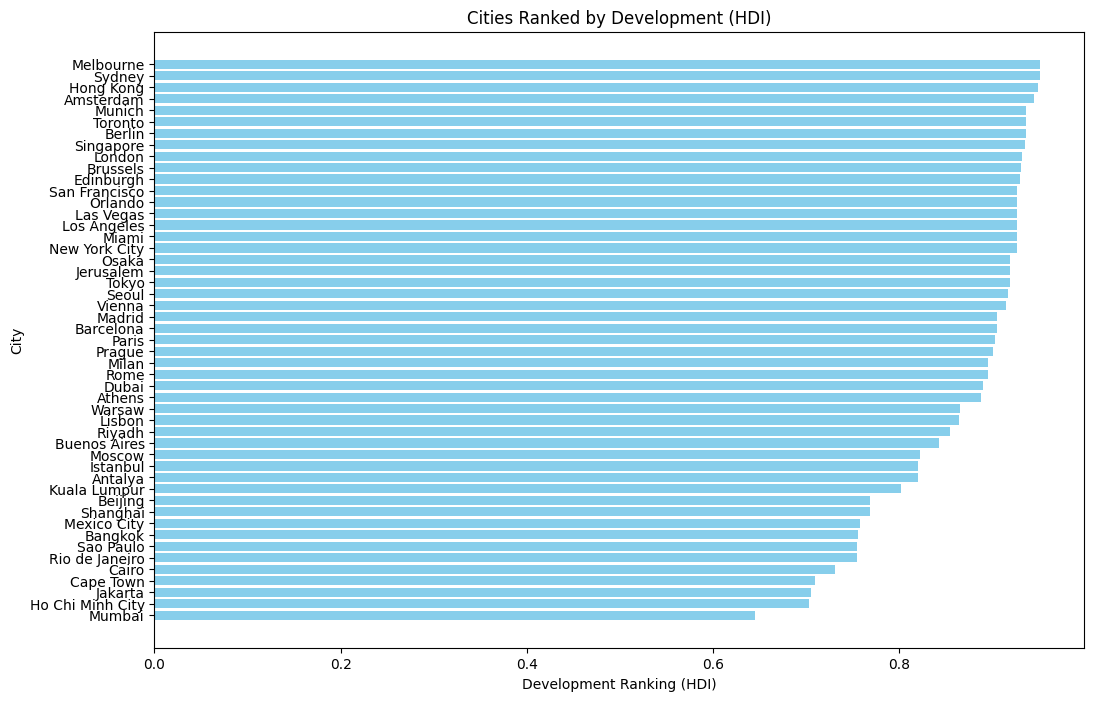

In [26]:
# Sort cities by Development Ranking (HDI) in descending order
cities_df_sorted = cities_df.sort_values(by='Development Ranking (HDI)', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(cities_df_sorted['City'], cities_df_sorted['Development Ranking (HDI)'], color='skyblue')
plt.xlabel("Development Ranking (HDI)")
plt.ylabel("City")
plt.title("Cities Ranked by Development (HDI)")
plt.gca().invert_yaxis()
plt.show()


## Step 3: Interactive Visualization of Cities by PCA Components

To better understand the similarities between cities, we'll apply Principal Component Analysis (PCA) to reduce the data's dimensionality. PCA combines several attributes into two main components, allowing us to visualize cities in a 2D space.

Each point in the scatter plot represents a city, and the color reflects its Development Ranking (HDI). This interactive plot lets us explore relationships between cities visually.


In [31]:
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Encode categorical variables (Religion and Language)
encoder = LabelEncoder()
cities_df['Religion_encoded'] = encoder.fit_transform(cities_df['Religion'])
cities_df['Language_encoded'] = encoder.fit_transform(cities_df['Language'])

# Standardize data for PCA
features = ['Development Ranking (HDI)', 'Latitude', 'Longitude', 'Religion_encoded', 'Language_encoded']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cities_df[features])

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
cities_df[['PCA1', 'PCA2']] = pca.fit_transform(scaled_features)

# Interactive Plotting with Plotly, displaying city names with adjustments
fig = px.scatter(
    cities_df,
    x='PCA1',
    y='PCA2',
    color='Development Ranking (HDI)',
    text='City',  # Display city names
    title="Interactive Visualization of Cities by PCA Components",
    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'},
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update the layout with a larger figure size and adjusted text position
fig.update_traces(
    textposition='top right',  # Position labels to the top right of each point to reduce overlap
    marker=dict(size=8, opacity=0.8)  # Smaller markers with slightly reduced opacity
)
fig.update_layout(
    coloraxis_colorbar=dict(title="Development Ranking (HDI)"),
    width=1400,  # Significantly wider plot
    height=1000  # Taller plot
)

# Display the interactive plot
fig.show()

